3. Do sterownika zdefiniowanego w poprzednim zadaniu dodaj nową zmienną wejściową jakość
jedzenia, która niech ma 3 wartości zmiennej lingwistycznej, następnie uaktualnij zbiór reguł, aby
druga zmienna również wpływała na decyzję. W regułach wykorzystaj spójnik logiczny and (w
pakiecie scikit-fuzzy oznaczany jako &). Spróbuj podstawić różne oceny jakości obsługi i jakości
jedzenia i obserwuj zmianę wartości zmiennej wyjściowej. Zastanów się, czy uzyskany w ten
sposób sterownik dobrze rozwiązuje problem i w razie konieczności zmodyfikuj podane zbiory
rozmyte, i/lub reguły, tak, aby sterownik działał intuicyjnie poprawnie. 

c:\Users\pppfk\Documents\studia\systemy rozmyte lab\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


12.95468509984639


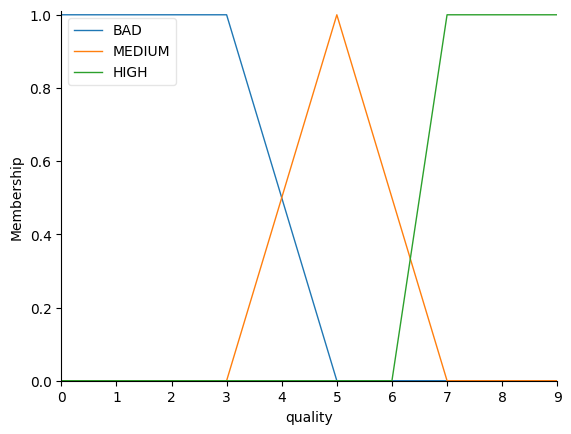

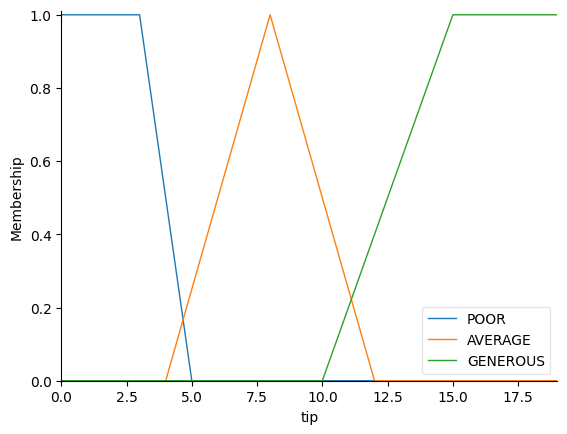

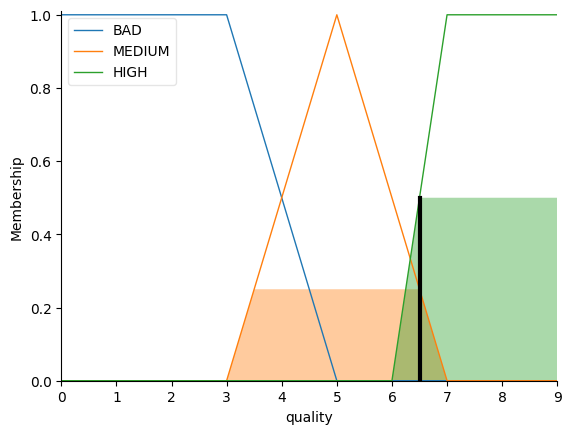

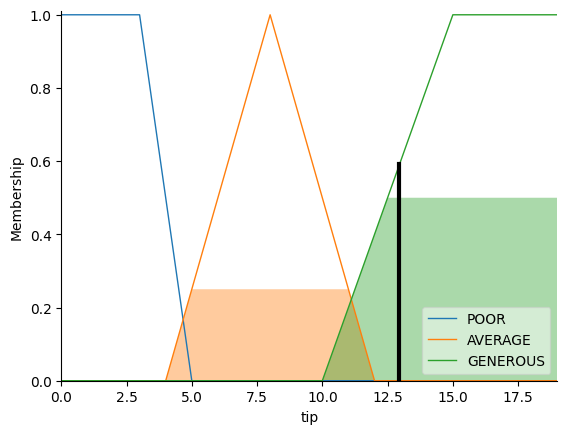

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# zmienna wejściowa
quality_of_service = ctrl.Antecedent(np.arange(0, 10, 1), 'quality')
# zmienna wyjściowa
tip = ctrl.Consequent(np.arange(0, 20, 1), 'tip')
# funkcje przynależności do zmiennej wejściowej
quality_of_service['BAD'] = fuzz.trapmf(quality_of_service.universe, [0, 0, 3, 5])
quality_of_service['MEDIUM'] = fuzz.trimf(quality_of_service.universe, [3, 5, 7])
quality_of_service['HIGH'] = fuzz.trapmf(quality_of_service.universe, [6, 7, 10, 10])
quality_of_service.view()
# funkcje przynależności do zmiennej wyjściowej
tip['POOR'] = fuzz.trapmf(tip.universe, [0, 0, 3, 5])
tip['AVERAGE'] = fuzz.trimf(tip.universe, [4, 8, 12])
tip['GENEROUS'] = fuzz.trapmf(tip.universe, [10, 15, 20, 20])
tip.view()
# reguły rozmyte
rule1 = ctrl.Rule(quality_of_service['BAD'], tip['POOR'])
rule2 = ctrl.Rule(quality_of_service['MEDIUM'], tip['AVERAGE'])
rule3 = ctrl.Rule(quality_of_service['HIGH'], tip['GENEROUS'])
# definiujemy sterownik rozmyty
# sterownik składa z reguł rozmytych
# ale same reguły składają się ze zdefiniowanych wcześniej
# wejść/wyjść
tipper_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
# symulacja działania sterownika
tipper_simulation = ctrl.ControlSystemSimulation(tipper_ctrl)
# ustalamy wejście ostre (crisp)
tipper_simulation.input['quality'] = 6.5
# fuzzyfikacja wejścia ostrego - zamiana go na wejście rozmyte
# podstawienie rozmytego wejścia do reguł
# odczytanie z reguł rozmytego wyjścia
# defuzzyfikacja zmiennej wyjściowej
tipper_simulation.compute()
quality_of_service.view(sim=tipper_simulation)
tip.view(sim=tipper_simulation)
print(tipper_simulation.output['tip'])
plt.show()





4. Wyobraź sobie, że tworzysz sterownik rozmyty dla autonomicznego pojazdu.
Załóżmy, że autonomiczny pojazd potrafi zmierzyć odległość od najbliższego pojazdu w metrach i
jednocześnie jego hamulce są sterowane za pomocą poziomów od 0 (brak hamowania) do 6 (bardzo
mocne hamowanie), przy czym poziomy są ciągłe (to znaczy możliwa jest dowolna wartość w
przedziale [0, 6]). Za pomocą pakietu scikit-fuzzy zamodeluj zmienną lingwistyczną odległość od
najbliższego pojazdu, która będzie zmienną wejściową i zmienną lingwistyczną hamowanie, która
będzie zmienną wyjściową; następnie zaproponuj rozmyte reguły wnioskowania, które będą na
postawie odległości od najbliższego pojazdu proponować hamowanie w celu uniknięcia kolizji z
tym pojazdem.


In [2]:
# zmienna wejściowa
distance = ctrl.Antecedent(np.arange(0, 200, 1), 'distance')
# zmienna wyjściowa
braking = ctrl.Consequent(np.arange(0, 6, 0.01), 'braking')

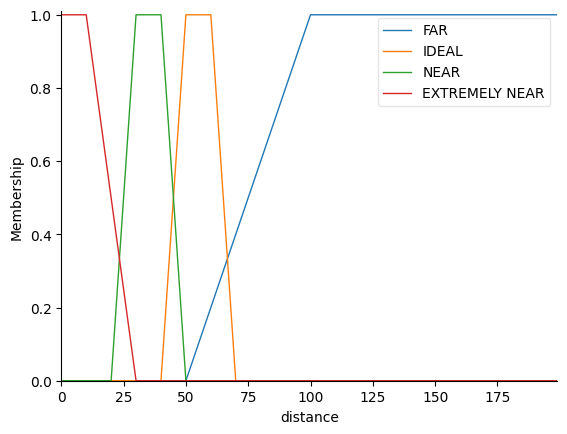

In [3]:
# funkcje przynależności do zmiennej wejściowej
distance['FAR'] = fuzz.trapmf(distance.universe, [50, 100, 200, 200])
distance['IDEAL'] = fuzz.trapmf(distance.universe, [40, 50, 60, 70])
distance['NEAR'] = fuzz.trapmf(distance.universe, [20, 30, 40, 50])
distance['EXTREMELY NEAR'] = fuzz.trapmf(distance.universe, [0, 0, 10, 30])
distance.view()

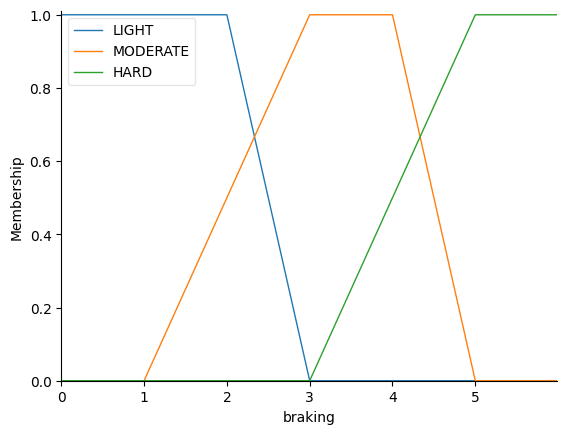

In [4]:
# funkcje przynależności do zmiennej wyjściowej
braking["LIGHT"] = fuzz.trapmf(braking.universe, [0, 0, 2, 3])
braking["MODERATE"] = fuzz.trapmf(braking.universe, [1, 3, 4, 5])
braking["HARD"] = fuzz.trapmf(braking.universe, [3, 5, 6, 6])
braking.view()

In [5]:
rule1 = ctrl.Rule(distance['EXTREMELY NEAR'], braking['HARD'])
rule2 = ctrl.Rule(distance['NEAR'], braking['MODERATE'])
rule3 = ctrl.Rule(distance['IDEAL'], braking['LIGHT'])
rule4 = ctrl.Rule(distance['FAR'], braking['LIGHT'])

{'braking': np.float64(1.266666666666668)}


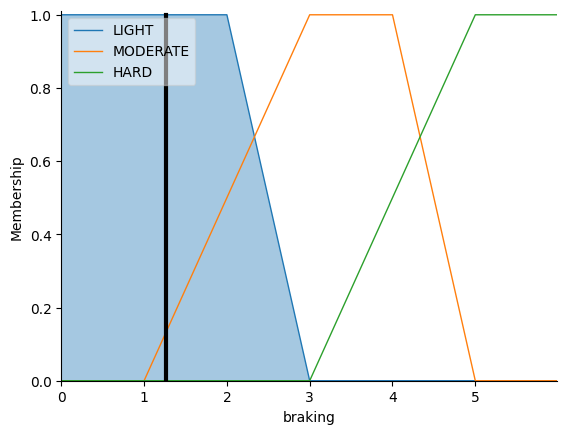

In [6]:
braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
# symulacja działania sterownika
braking_simulation = ctrl.ControlSystemSimulation(braking_ctrl)

# ustalamy wejście ostre (crisp)
braking_simulation.input['distance'] = 200
# fuzzyfikacja wejścia ostrego - zamiana go na wejście rozmyte
# podstawienie rozmytego wejścia do reguł
# odczytanie z reguł rozmytego wyjścia
# defuzzyfikacja zmiennej wyjściowej
braking_simulation.compute()
braking.view(sim=braking_simulation)
print(braking_simulation.output)
# plt.show()

5. Rozwiń model w poprzedniego zadania o nową zmienną wejściową, jaką jest wilgotność
nawierzchni drogowej (ponownie zakładamy, że pojazd autonomiczny potrafi ocenić za pomocą
czujnika tę wielkość). Pamiętaj, że droga efektywnego hamownia zależy m.in. właśnie od poziomu
wilgotności powierzchni.

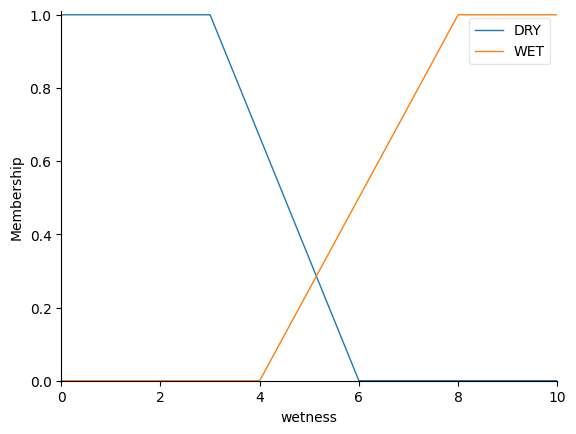

In [7]:
# zmienna wejściowa
wetness = ctrl.Antecedent(np.arange(0, 11, 1), 'wetness')
# funkcje przynależności do zmiennej wejściowej
wetness['DRY'] = fuzz.trapmf(wetness.universe, [0, 0, 3, 6])
wetness['WET'] = fuzz.trapmf(wetness.universe, [4, 8, 10, 10])
wetness.view()

In [8]:
rule1 = ctrl.Rule(wetness['WET'] & distance['EXTREMELY NEAR'], braking['HARD'])
rule2 = ctrl.Rule(wetness['DRY'] & distance['EXTREMELY NEAR'], braking['HARD'])
rule3 = ctrl.Rule(wetness['WET'] & distance['NEAR'], braking['HARD'])
rule4 = ctrl.Rule(wetness['DRY'] & distance['NEAR'], braking['MODERATE'])
rule5 = ctrl.Rule(wetness['WET'] & distance['IDEAL'], braking['MODERATE'])
rule6 = ctrl.Rule(wetness['DRY'] & distance['IDEAL'], braking['LIGHT'])
rule7 = ctrl.Rule(wetness['WET'] & distance['FAR'], braking['LIGHT'])
rule8 = ctrl.Rule(wetness['DRY'] & distance['FAR'], braking['LIGHT'])

{'braking': np.float64(3.532719003234998)}


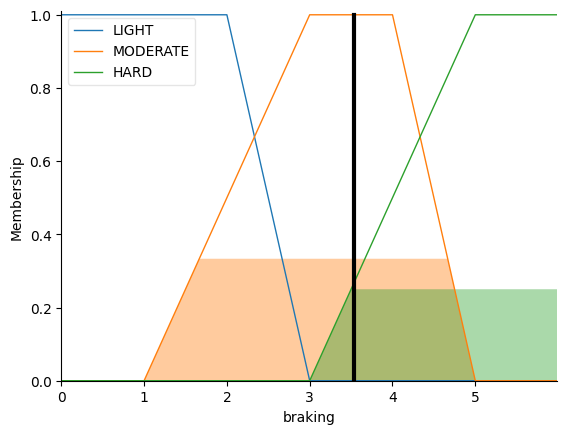

In [9]:
braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
# symulacja działania sterownika
braking_simulation = ctrl.ControlSystemSimulation(braking_ctrl)

# ustalamy wejście ostre (crisp)
braking_simulation.input['distance'] = 40
braking_simulation.input['wetness'] = 5
# fuzzyfikacja wejścia ostrego - zamiana go na wejście rozmyte
# podstawienie rozmytego wejścia do reguł
# odczytanie z reguł rozmytego wyjścia
# defuzzyfikacja zmiennej wyjściowej
braking_simulation.compute()
braking.view(sim=braking_simulation)
print(braking_simulation.output)

6. Do modelu z poprzedniego zadania dodaj jeszcze zmienną lingwistyczną oblodzenie nawierzchni
drogowej.

c:\Users\pppfk\Documents\studia\systemy rozmyte lab\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


{'braking': np.float64(4.654696082531707)}


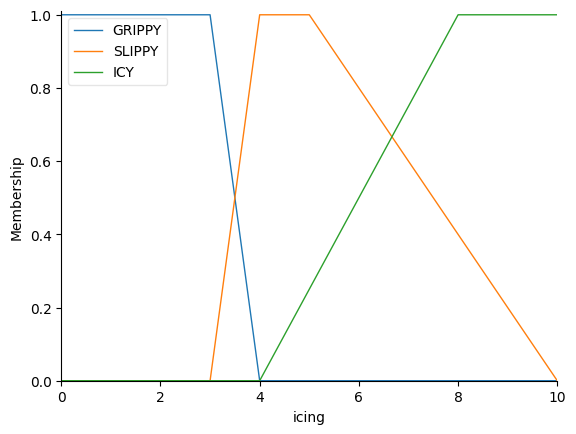

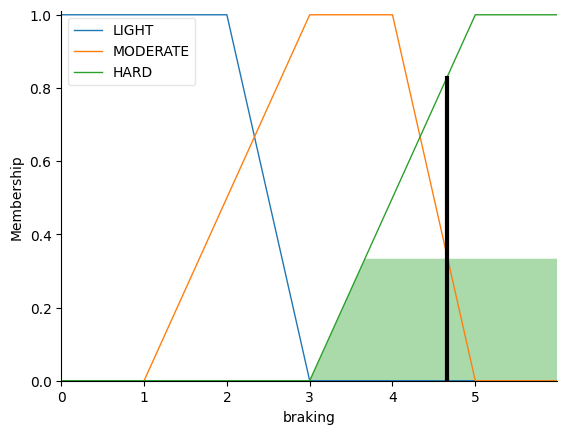

In [15]:
# zmienna wejściowa
icing = ctrl.Antecedent(np.arange(0, 11, 1), 'icing')
# funkcje przynależności do zmiennej wejściowej
icing['GRIPPY'] = fuzz.trapmf(wetness.universe, [0, 0, 3, 4])
icing['SLIPPY'] = fuzz.trapmf(wetness.universe, [3, 4, 5, 10])
icing['ICY'] = fuzz.trapmf(wetness.universe, [4, 8, 10, 10])
icing.view()

rule1 = ctrl.Rule(wetness['WET'] & distance['EXTREMELY NEAR'] & icing["GRIPPY"], braking['HARD'])
rule2 = ctrl.Rule(wetness['DRY'] & distance['EXTREMELY NEAR'] & icing["GRIPPY"], braking['HARD'])
rule3 = ctrl.Rule(wetness['WET'] & distance['NEAR'] & icing["GRIPPY"],  braking['HARD'])
rule4 = ctrl.Rule(wetness['DRY'] & distance['NEAR'] & icing["GRIPPY"], braking['MODERATE'])
rule5 = ctrl.Rule(wetness['WET'] & distance['IDEAL'] & icing["GRIPPY"], braking['MODERATE'])
rule6 = ctrl.Rule(wetness['DRY'] & distance['IDEAL'] & icing["GRIPPY"], braking['LIGHT'])
rule7 = ctrl.Rule(wetness['WET'] & distance['FAR'] & icing["GRIPPY"], braking['LIGHT'])
rule8 = ctrl.Rule(wetness['DRY'] & distance['FAR'] & icing["GRIPPY"], braking['LIGHT'])
rule9 = ctrl.Rule(wetness['WET'] & distance['EXTREMELY NEAR'] & icing["SLIPPY"], braking['HARD'])
rule10 = ctrl.Rule(wetness['DRY'] & distance['EXTREMELY NEAR'] & icing["SLIPPY"], braking['HARD'])
rule11 = ctrl.Rule(wetness['WET'] & distance['NEAR'] & icing["SLIPPY"], braking['HARD'])
rule12 = ctrl.Rule(wetness['DRY'] & distance['NEAR'] & icing["SLIPPY"], braking['HARD'])
rule13 = ctrl.Rule(wetness['WET'] & distance['IDEAL'] & icing["SLIPPY"], braking['MODERATE'])
rule14= ctrl.Rule(wetness['DRY'] & distance['IDEAL']  & icing["SLIPPY"], braking['LIGHT'])
rule15 = ctrl.Rule(wetness['WET'] & distance['FAR']  & icing["SLIPPY"], braking['LIGHT'])
rule16 = ctrl.Rule(wetness['DRY'] & distance['FAR'] & icing["SLIPPY"], braking['LIGHT'])
rule17 = ctrl.Rule(wetness['WET'] & distance['EXTREMELY NEAR'] & icing["ICY"], braking['HARD'])
rule18 = ctrl.Rule(wetness['DRY'] & distance['EXTREMELY NEAR'] & icing["ICY"], braking['HARD'])
rule19 = ctrl.Rule(wetness['WET'] & distance['NEAR'] & icing["ICY"], braking['HARD'])
rule20 = ctrl.Rule(wetness['DRY'] & distance['NEAR'] & icing["ICY"], braking['HARD'])
rule21 = ctrl.Rule(wetness['WET'] & distance['IDEAL'] & icing["ICY"], braking['MODERATE'])
rule22 = ctrl.Rule(wetness['DRY'] & distance['IDEAL'] & icing["ICY"], braking['LIGHT'])
rule23 = ctrl.Rule(wetness['WET'] & distance['FAR'] & icing["ICY"], braking['LIGHT'])
rule24 = ctrl.Rule(wetness['DRY'] & distance['FAR'] & icing["ICY"], braking['LIGHT'])

braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24])
# symulacja działania sterownika
braking_simulation = ctrl.ControlSystemSimulation(braking_ctrl)

# ustalamy wejście ostre (crisp)
braking_simulation.input['distance'] = 40
braking_simulation.input['wetness'] = 5
braking_simulation.input['icing'] = 5
# fuzzyfikacja wejścia ostrego - zamiana go na wejście rozmyte
# podstawienie rozmytego wejścia do reguł
# odczytanie z reguł rozmytego wyjścia
# defuzzyfikacja zmiennej wyjściowej
braking_simulation.compute()
braking.view(sim=braking_simulation)
print(braking_simulation.output)

7. Utworzyć sterownik rozmyty, który ocenia jakość owoców na podstawie pomiaru ich wagi i
określenia ich rozmiaru i posiada następujące funkcje przynależności do zmiennych wejściowych
(po lewo) i zmiennej wyjściowej (po prawo).
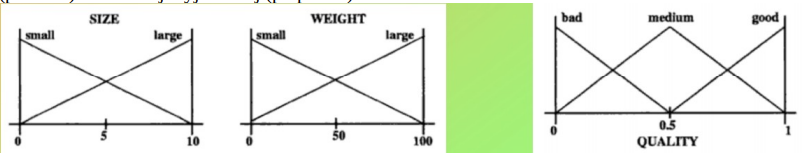

c:\Users\pppfk\Documents\studia\systemy rozmyte lab\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


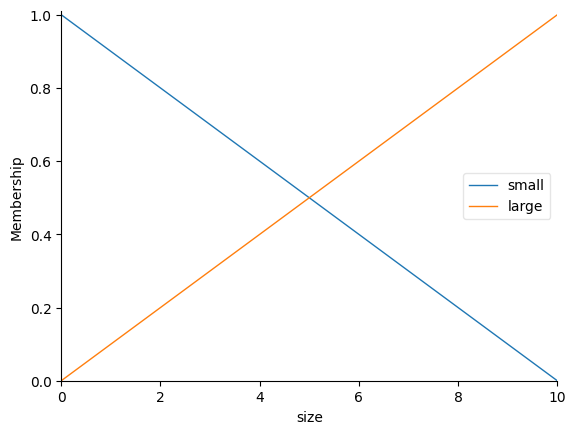

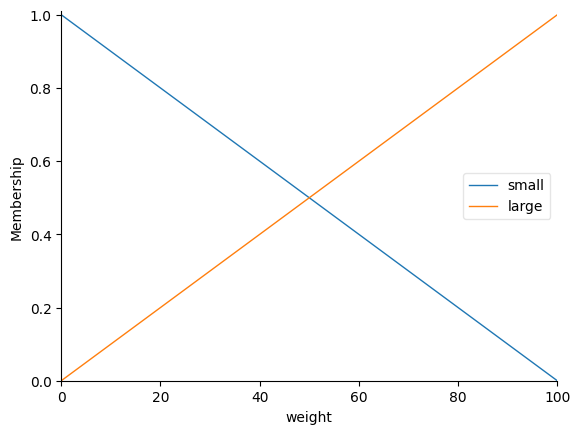

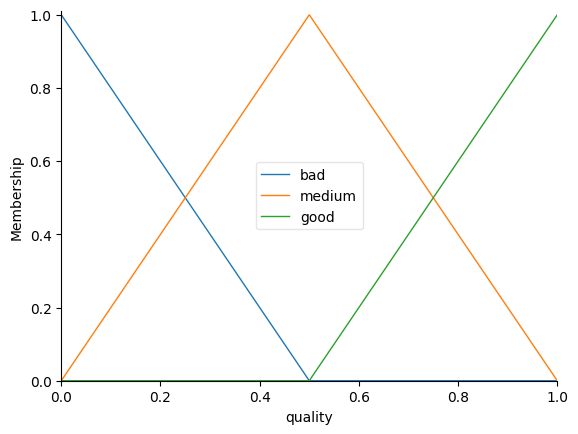

In [16]:
# zmienna wejściowa
size = ctrl.Antecedent(np.arange(0, 11, 1), 'size')
weight = ctrl.Antecedent(np.arange(0, 101, 1), 'weight')
# zmienna wyjściowa
quality = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'quality')
# funkcje przynależności do zmiennej wejściowej
size["small"] = fuzz.trimf(size.universe, [0,0,10])
size["large"] = fuzz.trimf(size.universe, [0,10,10])

weight["small"] = fuzz.trimf(weight.universe, [0,0,100])
weight["large"] = fuzz.trimf(weight.universe, [0,100,100])

size.view()
weight.view()

# funkcje przynależności do zmiennej wyjściowej
quality['bad'] = fuzz.trimf(quality.universe, [0,0,0.5])
quality['medium'] = fuzz.trimf(quality.universe, [0,0.5,1])
quality['good'] = fuzz.trimf(quality.universe, [0.5,1,1])

quality.view()

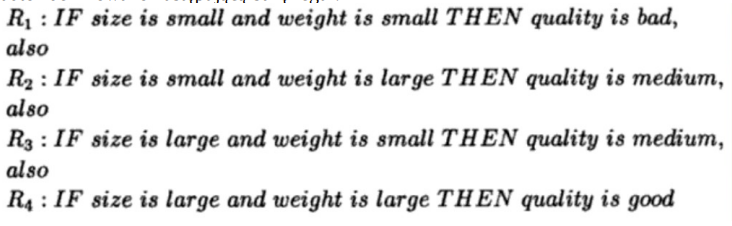

In [ ]:

# reguły rozmyte
rule1 = ctrl.Rule(size["small"] & weight["small"], quality["bad"])
rule2 = ctrl.Rule(size["small"] & weight["large"], quality["medium"])
rule3 = ctrl.Rule(size["large"] & weight["small"], quality["medium"])
rule4 = ctrl.Rule(size["large"] & weight["large"], quality["good"])
# definiujemy sterownik rozmyty
# sterownik składa z reguł rozmytych
# ale same reguły składają się ze zdefiniowanych wcześniej
# wejść/wyjść
quality_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
# symulacja działania sterownika
quality_simulation = ctrl.ControlSystemSimulation(quality_ctrl)
# ustalamy wejście ostre (crisp)
tipper_simulation.input['quality'] = 6.5
# fuzzyfikacja wejścia ostrego - zamiana go na wejście rozmyte
# podstawienie rozmytego wejścia do reguł
# odczytanie z reguł rozmytego wyjścia
# defuzzyfikacja zmiennej wyjściowej
tipper_simulation.compute()
quality_of_service.view(sim=tipper_simulation)
tip.view(sim=tipper_simulation)
print(tipper_simulation.output['tip'])
plt.show()



